# Tweet Sentiment Classifiers
<h4>Blake Rayvid - <a href=https://github.com/brayvid>https://github.com/brayvid</a></h4></br>
<h4>Dataset 1: <a href="https://www.kaggle.com/datasets/kazanova/sentiment140">https://www.kaggle.com/datasets/kazanova/sentiment140</a></h4>
<h4>Dataset 2: <a href="https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset">https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset</a> ⬅ better data in <code>selected_text</code> column</h4>

# Business problem
<h3><u>Brand reputation management</u></h3>
<h5>Being able to correctly classify new tweets by sentiment (positive, negative, neutral) allows a company to monitor the overall perception of their brand in the public domain.</h5>
<ul>
<li>Analyze negative feedback for insights into product weaknesses and use this to drive improvements.
<li>Identify accounts with consistent positive sentiment and offer to collaborate.
<li>Time launches of new products during periods of high positive sentiment.



# Imports

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 144
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

from wordcloud import WordCloud
from matplotlib.patches import Patch

# Dataset 1 (two classes) - initialize df here

In [ ]:
# filepath = 'training.1600000.processed.noemoticon.csv'
# df = pd.read_csv(filepath,encoding='latin-1',header=None)
# df.head()

In [ ]:
# df_sample = df.sample(n=100000, random_state=42)
# df_sample.to_csv('sentiment140_100000.csv',index=False)

## Dataset 1 + Decision Tree (various N)
<h4>Various sample sizes (10,000, 50,000 and 100,000) of tweets labeled positive or negative from a large dataset of 1.6 million labeled tweets.

In [ ]:
df_sample_1 = pd.read_csv('sentiment140_10000.csv')

In [ ]:
df_sample_5 = pd.read_csv('sentiment140_50000.csv')

In [ ]:
df_sample_10 = pd.read_csv('sentiment140_100000.csv')

In [ ]:
print("10,000 samples")
# Sample data and labels
tweets = df_sample_1.iloc[:,6]
labels = df_sample_1.iloc[:,1]  # 1 for positive, 0 for negative

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier() # no depth limit
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

10,000 samples
Number of features: 14568
Tree depth: 297
Train accuracy: 1.0
Test accuracy: 0.6406666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63      1475
           4       0.65      0.65      0.65      1525

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



In [ ]:
print("50,000 samples")
# Sample data and labels
tweets = df_sample_5.iloc[:,6]
labels = df_sample_5.iloc[:,1]  # 1 for positive, 0 for negative

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier() # no depth limit
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

50,000 samples
Number of features: 45738
Tree depth: 668
Train accuracy: 0.9998
Test accuracy: 0.6661333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.67      7467
           4       0.67      0.66      0.67      7533

    accuracy                           0.67     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.67      0.67      0.67     15000



In [ ]:
print("100,000 samples")
# Sample data and labels
tweets = df_sample_10.iloc[:,6]
labels = df_sample_10.iloc[:,1]  # 1 for positive, 0 for negative

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier() # no depth limit
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

100,000 samples
Number of features: 75146
Tree depth: 910
Train accuracy: 0.9997428571428572
Test accuracy: 0.6798
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68     14951
           4       0.68      0.68      0.68     15049

    accuracy                           0.68     30000
   macro avg       0.68      0.68      0.68     30000
weighted avg       0.68      0.68      0.68     30000



In [ ]:
print("10,000 samples")
# Sample data and labels
tweets = df_sample_1.iloc[:,6]
labels = df_sample_1.iloc[:,1]  # 1 for positive, 0 for negative

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=100) # no depth limit
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

10,000 samples
Number of features: 14568
Tree depth: 100
Train accuracy: 0.9415714285714286
Test accuracy: 0.6306666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      1475
           4       0.63      0.67      0.65      1525

    accuracy                           0.63      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.63      0.63      0.63      3000



In [ ]:
print("50,000 samples")
# Sample data and labels
tweets = df_sample_5.iloc[:,6]
labels = df_sample_5.iloc[:,1]  # 1 for positive, 0 for negative

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=100) # no depth limit
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

50,000 samples
Number of features: 45738
Tree depth: 100
Train accuracy: 0.9052285714285714
Test accuracy: 0.6688666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65      7467
           4       0.66      0.72      0.68      7533

    accuracy                           0.67     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.67      0.67      0.67     15000



In [ ]:
print("100,000 samples")
# Sample data and labels
tweets = df_sample_10.iloc[:,6]
labels = df_sample_10.iloc[:,1]  # 1 for positive, 0 for negative

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=100) # no depth limit
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

100,000 samples
Number of features: 75146
Tree depth: 100
Train accuracy: 0.9039285714285714
Test accuracy: 0.6781666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66     14951
           4       0.66      0.74      0.70     15049

    accuracy                           0.68     30000
   macro avg       0.68      0.68      0.68     30000
weighted avg       0.68      0.68      0.68     30000



In [ ]:
# clf = DecisionTreeClassifier(max_depth=100)
# clf.fit(X_train_vec, y_train)

# # Predicting and evaluating
# y_pred = clf.predict(X_test_vec)
# print("Tree depth:", clf.get_depth())
# print("Train accuracy:",clf.score(X_train_vec,y_train))
# print("Test accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# plt.figure(figsize=(20,10))
# plot_tree(clf, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=["Negative", "Positive"], rounded=True)
# plt.show()

In [ ]:
# len(vectorizer.get_feature_names_out())

In [ ]:
# clf.get_depth()

## Dataset 1 + Logistic Regression ⭐️

50,000 samples
Number of features: 45738
Train accuracy: 0.8474
Test accuracy: 0.7707333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      7467
           4       0.77      0.77      0.77      7533

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



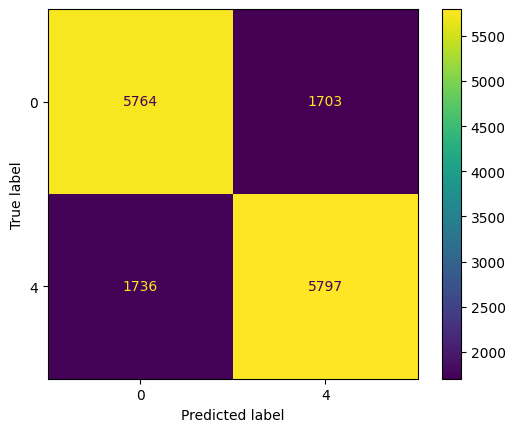

In [ ]:
print("50,000 samples")
# Sample data and labels
tweets = df_sample_5.iloc[:,6]
labels = df_sample_5.iloc[:,1]  # 1 for positive, 0 for negative

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = LogisticRegression() # no depth limit
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
# print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

## Dataset 1 + Support Vector Classifier

10,000 samples
Number of features: 14568
Train accuracy: 0.9858571428571429
Test accuracy: 0.745
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      1475
           4       0.76      0.73      0.74      1525

    accuracy                           0.74      3000
   macro avg       0.75      0.75      0.74      3000
weighted avg       0.75      0.74      0.74      3000



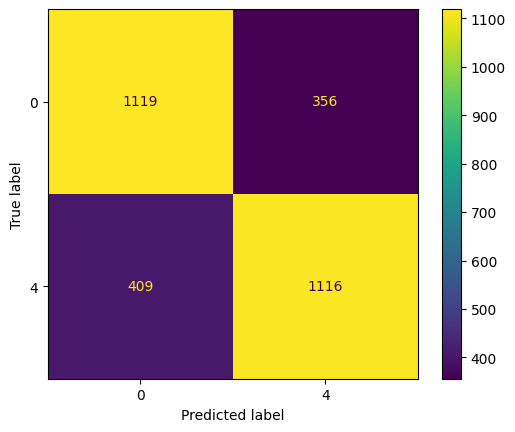

In [ ]:
print("10,000 samples")
# Sample data and labels
tweets = df_sample_1.iloc[:,6]
labels = df_sample_1.iloc[:,1]  # 1 for positive, 0 for negative

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the SVC (can be slow)
clf = SVC()
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
# print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

# Dataset 2 (three classes) - initialize df here

In [ ]:
df = pd.read_csv('Tweets.csv')
df = df.dropna()
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


## Dataset 2 ("text") + Decision Tree (various depth)
<h4>27,480 tweets labeled positive, negative or neutral.</h4>

Number of features: 21322
Tree depth: 100
Train accuracy: 0.8925452276980661
Test accuracy: 0.6245754488112567
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55      2356
           1       0.58      0.71      0.64      3343
           2       0.71      0.64      0.67      2545

    accuracy                           0.62      8244
   macro avg       0.64      0.61      0.62      8244
weighted avg       0.63      0.62      0.62      8244



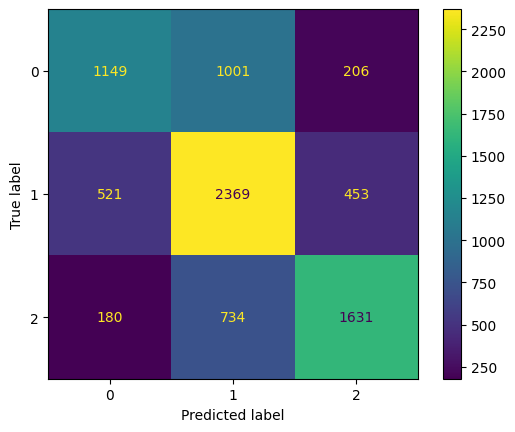

In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=100)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=100)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 21322
Tree depth: 582
Train accuracy: 0.9992721979621543
Test accuracy: 0.6006792819019893
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      2356
           1       0.58      0.61      0.59      3343
           2       0.66      0.65      0.66      2545

    accuracy                           0.60      8244
   macro avg       0.60      0.60      0.60      8244
weighted avg       0.60      0.60      0.60      8244



In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=50)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 21322
Tree depth: 50
Train accuracy: 0.7812435017675192
Test accuracy: 0.61608442503639
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.41      0.50      2356
           1       0.55      0.78      0.65      3343
           2       0.75      0.59      0.66      2545

    accuracy                           0.62      8244
   macro avg       0.65      0.59      0.60      8244
weighted avg       0.64      0.62      0.61      8244



In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=30)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 21322
Tree depth: 30
Train accuracy: 0.6950509461426492
Test accuracy: 0.5952207666181465
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.40      0.48      2356
           1       0.53      0.78      0.63      3343
           2       0.77      0.53      0.63      2545

    accuracy                           0.60      8244
   macro avg       0.63      0.57      0.58      8244
weighted avg       0.63      0.60      0.59      8244



In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 21322
Tree depth: 5
Train accuracy: 0.5048346849656893
Test accuracy: 0.5088549247937895
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.02      0.03      2356
           1       0.45      0.94      0.61      3343
           2       0.80      0.39      0.53      2545

    accuracy                           0.51      8244
   macro avg       0.66      0.45      0.39      8244
weighted avg       0.64      0.51      0.42      8244



In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier()
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 21322
Tree depth: 581
Train accuracy: 0.9992721979621543
Test accuracy: 0.6033478893740902
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.54      0.55      2356
           1       0.58      0.61      0.60      3343
           2       0.66      0.65      0.66      2545

    accuracy                           0.60      8244
   macro avg       0.60      0.60      0.60      8244
weighted avg       0.60      0.60      0.60      8244



## Dataset 2 ("selected_text") + Decision Tree Classifer (various depth)
<h4>The part of each tweet in dataset 2 identifed as relevant, labeled positive, negative or neutral.</h4>

In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 14168
Tree depth: 5
Train accuracy: 0.5036390101892285
Test accuracy: 0.507520621057739
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.88      0.52      2356
           1       0.75      0.45      0.56      3343
           2       0.93      0.24      0.38      2545

    accuracy                           0.51      8244
   macro avg       0.68      0.52      0.49      8244
weighted avg       0.70      0.51      0.50      8244



In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=30)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 14168
Tree depth: 30
Train accuracy: 0.7258785610313995
Test accuracy: 0.6616933527413876
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.81      0.62      2356
           1       0.76      0.70      0.73      3343
           2       0.86      0.47      0.61      2545

    accuracy                           0.66      8244
   macro avg       0.71      0.66      0.65      8244
weighted avg       0.72      0.66      0.66      8244



In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=30)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 14131
Tree depth: 30
Train accuracy: 0.7366396340195467
Test accuracy: 0.6525958272683163
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.82      0.62      2334
           1       0.77      0.68      0.72      3335
           2       0.85      0.47      0.60      2575

    accuracy                           0.65      8244
   macro avg       0.70      0.65      0.65      8244
weighted avg       0.71      0.65      0.65      8244



In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=500)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 14131
Tree depth: 500
Train accuracy: 0.9709399043460178
Test accuracy: 0.7485443959243085
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71      2334
           1       0.76      0.75      0.76      3335
           2       0.82      0.73      0.78      2575

    accuracy                           0.75      8244
   macro avg       0.75      0.75      0.75      8244
weighted avg       0.75      0.75      0.75      8244



In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=400)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 14131
Tree depth: 400
Train accuracy: 0.9649095446038678
Test accuracy: 0.7455118874332848
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.71      2334
           1       0.76      0.74      0.75      3335
           2       0.83      0.74      0.78      2575

    accuracy                           0.75      8244
   macro avg       0.75      0.75      0.75      8244
weighted avg       0.75      0.75      0.75      8244



In [ ]:
labenc.inverse_transform([0,1,2])

array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier()
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 14131
Tree depth: 1712
Train accuracy: 0.9957891453524641
Test accuracy: 0.7513343037360505
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      2334
           1       0.76      0.76      0.76      3335
           2       0.82      0.75      0.78      2575

    accuracy                           0.75      8244
   macro avg       0.75      0.75      0.75      8244
weighted avg       0.75      0.75      0.75      8244



In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=300)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Number of features: 14131
Tree depth: 300
Train accuracy: 0.9532647119983364
Test accuracy: 0.7396894711305192
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70      2334
           1       0.76      0.74      0.75      3335
           2       0.82      0.72      0.77      2575

    accuracy                           0.74      8244
   macro avg       0.74      0.74      0.74      8244
weighted avg       0.75      0.74      0.74      8244



Number of features: 14131
Tree depth: 100
Train accuracy: 0.8915574963609898
Test accuracy: 0.7108199902959729
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.80      0.68      2334
           1       0.77      0.71      0.74      3335
           2       0.81      0.64      0.72      2575

    accuracy                           0.71      8244
   macro avg       0.72      0.71      0.71      8244
weighted avg       0.73      0.71      0.71      8244



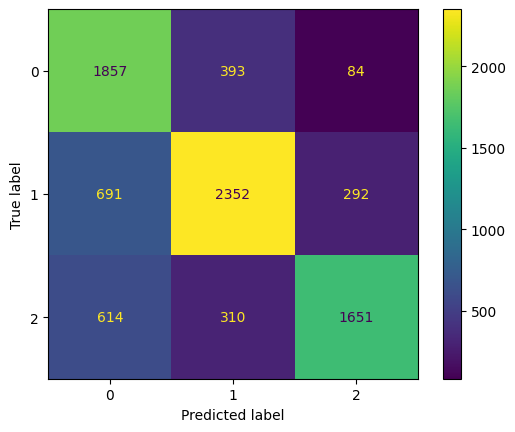

In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Training the decision tree (can be slow)
clf = DecisionTreeClassifier(max_depth=100)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

### Cross validation tuning

In [ ]:
def cross_validation(X_train, y_train, k, num_split = 10):

    X_train = X_train.values
    # y_train = y_train.values

    score_train_list = []
    score_val_list = []

    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):

        # train and validation splitting
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        # Vectorizing the data
        vectorizer = TfidfVectorizer()
        X_train_fold_vec = vectorizer.fit_transform(X_train_fold)
        X_val_fold_vec = vectorizer.transform(X_val_fold)

        # create/fit decision tree
        clf = DecisionTreeClassifier(max_depth = k)
        clf.fit(X_train_fold_vec, y_train_fold)

        # now how did we do?
        accuracy_train = clf.score(X_train_fold_vec, y_train_fold)
        accuracy_val = clf.score(X_val_fold_vec, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)

    return {'k': k, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# append results for each value of k

crossval_list = [pd.Series(cross_validation(X_train, y_train, k, 5)) for k in (np.logspace(0, 3, 4)).astype(int)]
cross_val_df = pd.concat(crossval_list, axis = 1).T

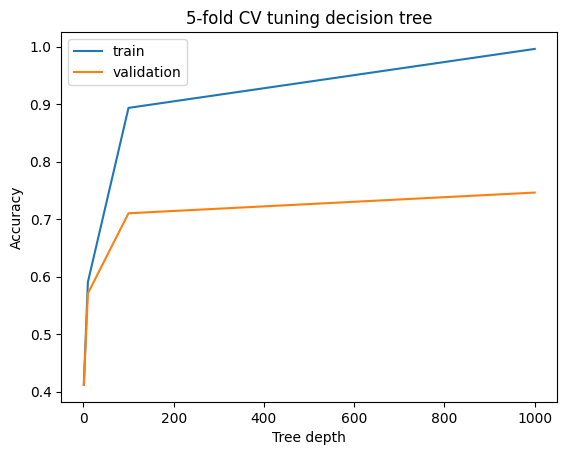

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x = 'k', y = 'train',
             data = cross_val_df,
             ax = ax, label = 'train')
sns.lineplot(x = 'k', y = 'validation',
             data = cross_val_df,
             ax = ax, label = 'validation')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold CV tuning decision tree')
ax.set_xlabel('Tree depth')
plt.show()

## Dataset 2 ("selected_text") + Random Forest Classifier

Number of features: 14131
Train accuracy: 0.9457787481804949
Test accuracy: 0.7956089277049976
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      2334
           1       0.77      0.87      0.82      3335
           2       0.89      0.72      0.80      2575

    accuracy                           0.80      8244
   macro avg       0.80      0.79      0.79      8244
weighted avg       0.80      0.80      0.80      8244



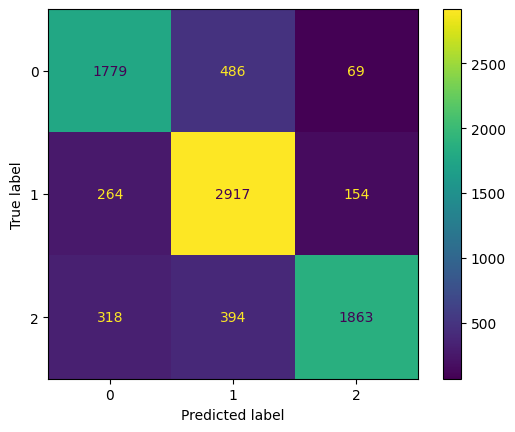

In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Fit Random Forest classifier
rfc = RandomForestClassifier(max_depth=100)
rfc.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = rfc.predict(X_test_vec)
# print("Tree depth:", rfc.get_depth())
print("Train accuracy:", rfc.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(rfc, X_test_vec, y_test)
plt.show()

## Dataset 2 ("selected_text") + Naive Bayes Classifier

Number of features: 14131
Train accuracy: 0.8526200873362445
Test accuracy: 0.7785055798156235
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.57      0.71      2334
           1       0.67      0.96      0.79      3335
           2       0.93      0.73      0.82      2575

    accuracy                           0.78      8244
   macro avg       0.84      0.75      0.77      8244
weighted avg       0.82      0.78      0.78      8244



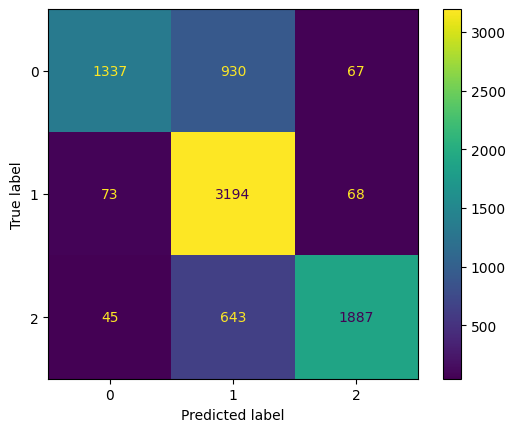

In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Fit Naive Bayes classifier
est = MultinomialNB()
est.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = est.predict(X_test_vec)
# print("Tree depth:", rfc.get_depth())
print("Train accuracy:", est.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(est, X_test_vec, y_test)
plt.show()

## Dataset 2 ("selected_text") + Support Vector Classifier ⭐️

Number of features: 14131
Train accuracy: 0.963297982948638
Test accuracy: 0.834061135371179
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      2334
           1       0.78      0.91      0.84      3335
           2       0.93      0.80      0.86      2575

    accuracy                           0.83      8244
   macro avg       0.85      0.82      0.83      8244
weighted avg       0.84      0.83      0.83      8244



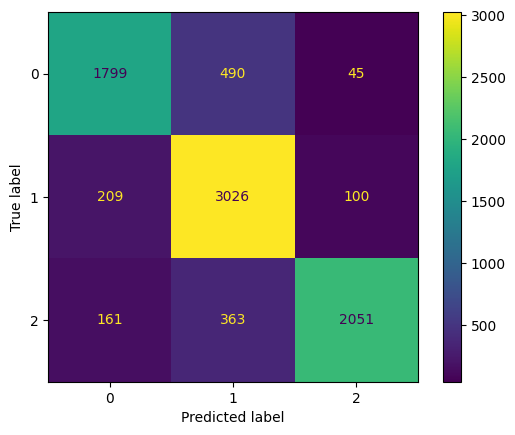

In [ ]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorizing the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print('Number of features:', len(vectorizer.get_feature_names_out()))

# Fit support vector classifier (slow)
est = SVC()
est.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = est.predict(X_test_vec)
# print("Tree depth:", rfc.get_depth())
print("Train accuracy:", est.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(est, X_test_vec, y_test)
plt.show()

# Comparison of baseline (untuned) models
<h4>Dataset 1 (two classes)</h4>
<table>
<tr>
<th>Model
<th>Train Acc
<th>Test Acc
<th>Best
</tr>
<tr>
<td>Decision Tree
<td>0.99
<td>0.67
<td>
</tr>
<tr>
<td>Log Reg
<td>0.84
<td>0.77
<td>⭐️
</tr>
<tr>
<td>SVC
<td>0.98
<td>0.74
<td>
</tr>
</table>
</br>
<h4>Dataset 2 (three classes, <code>selected_text</code>)</h4>
<table>
<tr>
<th>Model
<th>Train Acc
<th>Test Acc
<th>Best
</tr>
<tr>
<td>Decision Tree
<td>0.99
<td>0.75
<td>
</tr>
<tr>
<td>Random Forest
<td>0.94
<td>0.79
<td>
</tr>
<tr>
<td>Naive Bayes
<td>0.85
<td>0.77
<td>
</tr>
<tr>
<td>SVC
<td>0.96
<td>0.83
<td>⭐️
</tr>
</table>



# Top words visualization
Generate word cloud of top words and color by the word's most commonly associated sentiment (green = positive, red=negative, grey=neutral) - and scale words by their frequency.
- grey indicates the word was found in more tweets labeled neutral than anything else
- size of word indicates in how many tweets the word appeared

In [ ]:
top_words = pd.Series(np.concatenate([x.lower().replace('`',"'").split() for x in df['selected_text']])).value_counts()
top_words.head(50)

i         7140
to        5270
the       4576
a         3521
my        2770
and       2303
you       2286
is        2082
in        1937
for       1848
it        1810
of        1631
on        1437
so        1360
have      1329
me        1248
but       1244
i'm       1195
that      1182
not       1163
just      1144
be        1076
good      1075
with      1037
at         988
was        933
love       865
happy      801
day        784
this       774
get        765
like       753
no         728
all        727
are        709
out        678
up         657
go         648
it's       627
your       579
going      569
got        558
do         557
now        550
don't      543
miss       515
work       487
-          486
really     486
from       484
Name: count, dtype: int64

In [57]:
# https://gist.github.com/brianteachman/4522951

ignored = ["",
    '1','2','3','4','5','6','7','8','9','0',
    '.',',','?','!','...','-','&',
    'a',
    'about',
    'above',
    'after',
    'again',
    'against',
    'all',
    'am',
    'an',
    'and',
    'any',
    'are',
    "aren't",
    'as',
    'at',
    'be',
    'because',
    'been',
    'before',
    'being',
    'below',
    'between',
    'both',
    'but',
    'by',
    "can't",
    'cannot',
    'could',
    "couldn't",
    'did',
    "didn't",
    'do',
    'does',
    "doesn't",
    'doing',
    "don't",
    'down',
    'during',
    'each',
    'few',
    'for',
    'from',
    'further',
    'had',
    "hadn't",
    'has',
    "hasn't",
    'have',
    "haven't",
    'having',
    'he',
    "he'd",
    "he'll",
    "he's",
    'her',
    'here',
    "here's",
    'hers',
    'herself',
    'him',
    'himself',
    'his',
    'how',
    "how's",
    'i',
    "i'd",
    "i'll",
    "i'm",
    "i've",
    'if',
    'in',
    'into',
    'is',
    "isn't",
    'it',
    "it's",
    'its',
    'itself',
    'just',
    "let's",
    'me',
    'more',
    'most',
    "mustn't",
    'my',
    'myself',
    'no',
    'nor',
    'not',
    'of',
    'off',
    'on',
    'once',
    'only',
    'or',
    'other',
    'ought',
    'our',
    'ours',
    'ourselves',
    'out',
    'over',
    'own',
    'same',
    "shan't",
    'she',
    "she'd",
    "she'll",
    "she's",
    'should',
    "shouldn't",
    'so',
    'some',
    'such',
    'than',
    'that',
    "that's",
    'the',
    'their',
    'theirs',
    'them',
    'themselves',
    'then',
    'there',
    "there's",
    'these',
    'they',
    "they'd",
    "they'll",
    "they're",
    "they've",
    'this',
    'those',
    'through',
    'to',
    'too',
    'under',
    'until',
    'up',
    'very',
    'was',
    "wasn't",
    'we',
    "we'd",
    "we'll",
    "we're",
    "we've",
    'were',
    "weren't",
    'what',
    "what's",
    'when',
    "when's",
    'where',
    "where's",
    'which',
    'while',
    'who',
    "who's",
    'whom',
    'why',
    "why's",
    'with',
    "won't",
    'would',
    "wouldn't",
    'you',
    "you'd",
    "you'll",
    "you're",
    "you've",
    'your',
    'yours',
    'yourself',
    'yourselves',
    'zero'
    ]

In [58]:
filtered_top = top_words[~top_words.index.isin(ignored)]

In [76]:
filtered_top.head()

good     1075
love      865
happy     801
day       784
get       765
Name: count, dtype: int64

In [61]:
len(filtered_top)

28477

In [88]:
top50 = filtered_top[:10000]
top50_labeled = {}

for word, freq in top50.items():
  top50_labeled[word] = [0,0,0] # pos neg neut
  for tweet, label in zip(df['selected_text'],df['sentiment']):
    if word in tweet:
      if label == 'positive':
        top50_labeled[word][0] += 1
      elif label == 'negative':
        top50_labeled[word][1] += 1
      else:
        top50_labeled[word][2] += 1

for word, counts in top50_labeled.items():
  if counts[0] >= counts[1] and counts[0] >= counts[2]:
    top50_labeled[word] = [counts, 'positive']
  elif counts[1] >= counts[0] and counts[1] >= counts[2]:
    top50_labeled[word] = [counts, 'negative']
  else:
    top50_labeled[word] = [counts, 'neutral']

In [89]:
# top50_labeled

In [90]:
# https://stackoverflow.com/questions/61919884/mapping-wordcloud-color-to-a-value-for-sentiment-analysis
# https://stackoverflow.com/questions/70883110/python-wordcloud-how-to-make-the-word-colour-based-on-a-data-column
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, words_to_colors, default_color):
        self.word_to_color = words_to_colors
        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(top50_labeled[word][1], self.default_color)

In [91]:
def plot_word_cloud_dict_colormapped(d, color_fun, title, offset):
  plt.style.use("dark_background")
  wordcloud = WordCloud(collocations=False,width=1600, height=800, prefer_horizontal=1).generate_from_frequencies(d)
  wordcloud.recolor(color_func=color_fun)
  # plot the WordCloud image
  plt.figure(figsize=(14,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(title)
  # legend_elements = [Patch(facecolor=list(color_fun.word_to_color.values())[:26][i],label=list(color_fun.word_to_color.keys())[:26][i]) for i in range(26)]
  # plt.legend(handles=legend_elements,bbox_to_anchor=(offset, 1))
  plt.show()

In [98]:
label_colors = {
    'positive': '#04d104',
    'negative': '#d20303',
    'neutral': '#444444'
}

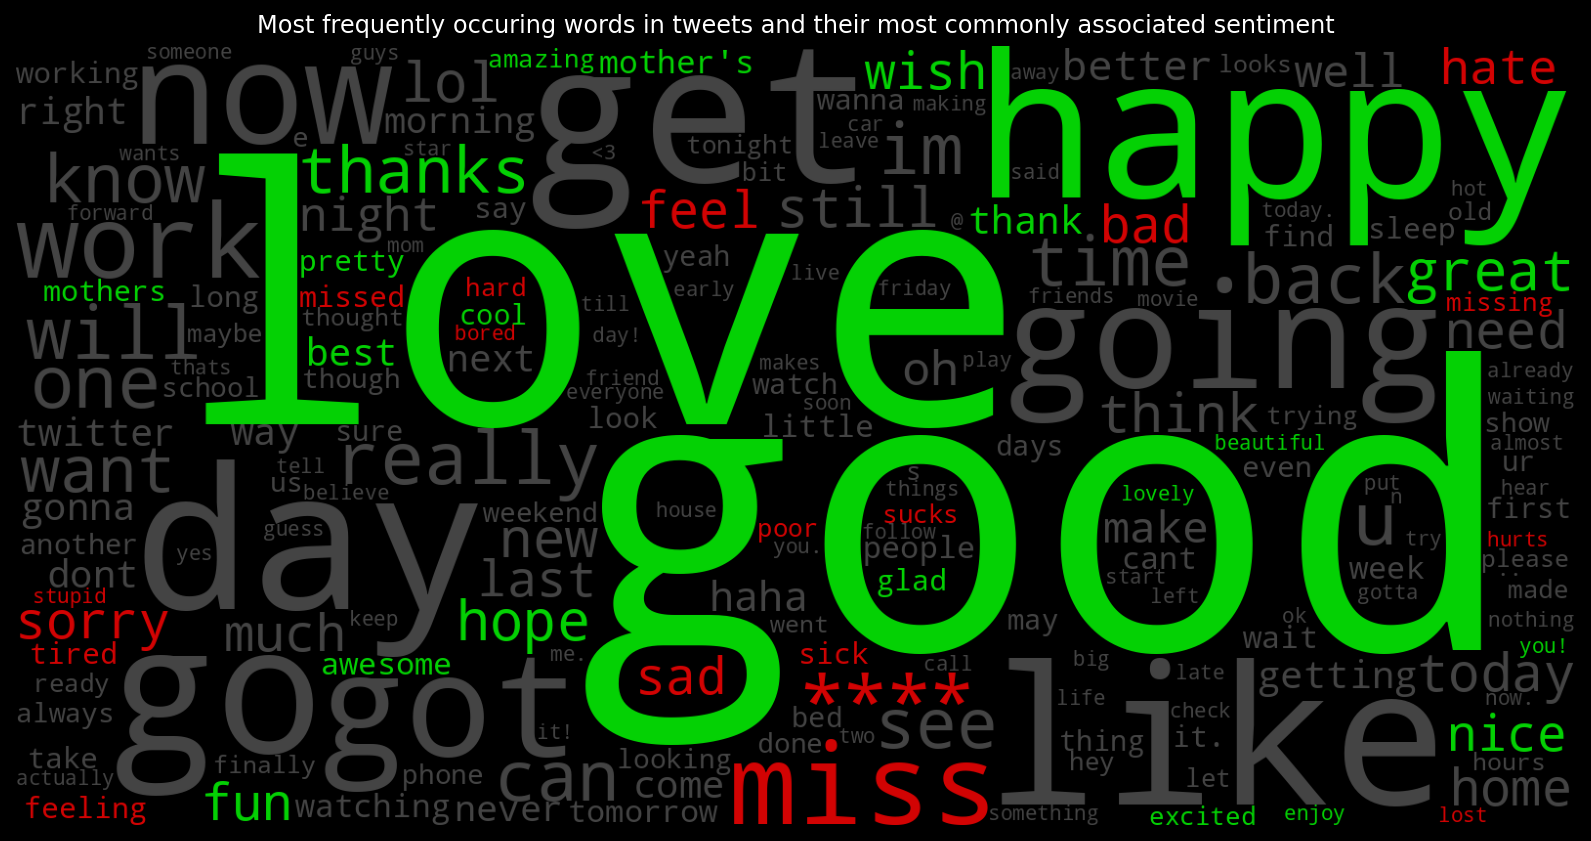

In [106]:
color_func= SimpleGroupedColorFunc(label_colors, '#000000')

plot_word_cloud_dict_colormapped(top50,color_func,'Most frequently occuring words in tweets and their most commonly associated sentiment', 1.2)

In [95]:
pd.Series([val[1] for key, val in top50_labeled.items()]).value_counts()

neutral     6948
positive    1809
negative    1243
Name: count, dtype: int64

# TO DO
Praveen meeting
Reducing dimensionality
- TSNE
- UMAP down to 2D to visualize class boundary

Params for SVC
- Gamma - radius
- Slack

<u>To Do:</u>
- Wrap the repetitive steps into a function that takes the model as an argument
- Display a nice decision tree with not too many levels for powerpoint
- Tune best models using cross validation
- Use UMAP to generate a nice 2D scatterplot showing the decision boundary
- Powerpoint
- Readme